In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [70]:
data = pd.read_csv('cleaned_data.csv')

In [71]:
# Drop columns that are not used
unwanted_columns = ['ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
                    'LOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS','PRICE_PER_SQFT']
data = data.drop(unwanted_columns, axis=1)

In [72]:
data

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,Manhattan,40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,New York County,40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,Richmond County,40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,New York County,40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,New York County,40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...
4582,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,New York,40.774350,-73.955879
4583,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,Queens County,40.732538,-73.860152
4584,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,New York County,40.745882,-74.003398
4585,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,Queens,40.742770,-73.872752


In [73]:
type_counts = data['TYPE'].value_counts()
type_counts

TYPE
Co-op for sale                1388
House for sale                 966
Condo for sale                 842
Multi-family home for sale     699
Townhouse for sale             288
Pending                        229
Contingent                      87
Land for sale                   47
For sale                        20
Foreclosure                     14
Condop for sale                  4
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

In [74]:
#SUBLOCALITY_type = data['SUBLOCALITY'].value_counts()
#SUBLOCALITY_type

In [75]:
type_dummies = pd.get_dummies(data['TYPE'], prefix='Type')
#sublocality_dummies = pd.get_dummies(data['SUBLOCALITY'], prefix='Sublocality')

In [76]:
type_dummies

,Type_Co-op for sale,Type_Coming Soon,Type_Condo for sale,Type_Condop for sale,Type_Contingent,Type_For sale,Type_Foreclosure,Type_House for sale,Type_Land for sale,Type_Mobile house for sale,Type_Multi-family home for sale,Type_Pending,Type_Townhouse for sale
0,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582,True,False,False,False,False,False,False,False,False,False,False,False,False
4583,True,False,False,False,False,False,False,False,False,False,False,False,False
4584,True,False,False,False,False,False,False,False,False,False,False,False,False
4585,False,False,True,False,False,False,False,False,False,False,False,False,False


In [77]:
#sublocality_dummies

In [78]:
# Concatenate the dummy variables with the original dataset
data = pd.concat([data, type_dummies], axis=1)

# Drop the original 'TYPE' and 'SUBLOCALITY' columns
data.drop(['TYPE', 'SUBLOCALITY'], axis=1, inplace=True)

In [79]:
data = data.drop('BROKERTITLE', axis=1)

In [80]:
data = data.astype(int)

In [81]:
data

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,Type_Co-op for sale,Type_Coming Soon,Type_Condo for sale,Type_Condop for sale,Type_Contingent,Type_For sale,Type_Foreclosure,Type_House for sale,Type_Land for sale,Type_Mobile house for sale,Type_Multi-family home for sale,Type_Pending,Type_Townhouse for sale
0,315000,2,2,1400,40,-73,0,0,1,0,0,0,0,0,0,0,0,0,0
1,195000000,7,10,17545,40,-73,0,0,1,0,0,0,0,0,0,0,0,0,0
2,260000,4,2,2015,40,-74,0,0,0,0,0,0,0,1,0,0,0,0,0
3,69000,3,1,445,40,-73,0,0,1,0,0,0,0,0,0,0,0,0,0
4,55000000,7,2,14175,40,-73,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582,599000,1,1,2184,40,-73,1,0,0,0,0,0,0,0,0,0,0,0,0
4583,245000,1,1,2184,40,-73,1,0,0,0,0,0,0,0,0,0,0,0,0
4584,1275000,1,1,2184,40,-74,1,0,0,0,0,0,0,0,0,0,0,0,0
4585,598125,2,1,655,40,-73,0,0,1,0,0,0,0,0,0,0,0,0,0


In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

Since the data contains some large numbers, proper feature scaling is needed, especially since the scale of the features can significantly impact the performance of many machine learning models.

In [94]:
numeric_features = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']

In [98]:
scaler = StandardScaler()

# Scale the numeric features
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [99]:
# Check the scaled features
print(data[numeric_features].head())

      PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
0 -0.064437 -0.519614 -0.179790     -0.340646       0.0   0.491332
1  6.007172  1.382596  3.880253      6.731665       0.0   0.491332
2 -0.066153  0.241270 -0.179790     -0.071246       0.0  -2.035283
3 -0.072109 -0.139172 -0.687295     -0.758983       0.0   0.491332
4  1.641015  1.382596 -0.179790      5.255438       0.0   0.491332


In [102]:
# since we are going to see and predict the price trend in NYC, we will set the price as the target variable
X = data.drop('PRICE', axis=1)  
y = data['PRICE']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Decision Tree
dtree_model = DecisionTreeRegressor(random_state=42)
dtree_model.fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
dtree_mse = mean_squared_error(y_test, dtree_predictions)
print(f'Decision Tree MSE: {dtree_mse}')

Decision Tree MSE: 9.675036802255498


In [104]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest MSE: {rf_mse}')

Random Forest MSE: 5.292476817024735


The MSE results(9.67 for Decision Tree and 5.29 for Random Forest) appear significantly lower than before non scale, indicating that scaling the features likely had a positive impact on model performance. Since these values are still relatively high, it's important to consider whether these represent good predictive performance based on the specific data scale.

In [105]:
# Get feature importances from both models
dtree_importances = pd.Series(dtree_model.feature_importances_, index=X_train.columns)
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort the features by importance
dtree_top5 = dtree_importances.nlargest(5)
rf_top5 = rf_importances.nlargest(5)

In [107]:
# Display the top 5 features
print("Top 5 Important Features for Decision Tree:")
print(dtree_top5)

Top 5 Important Features for Decision Tree:
PROPERTYSQFT                       0.987850
Type_Condo for sale                0.007573
BEDS                               0.001398
BATH                               0.001169
Type_Multi-family home for sale    0.000849
dtype: float64


In [108]:
print("\nTop 5 Important Features for Random Forest:")
print(rf_top5)


Top 5 Important Features for Random Forest:
PROPERTYSQFT           0.834668
Type_Condo for sale    0.057107
BATH                   0.035834
BEDS                   0.021589
LONGITUDE              0.017231
dtype: float64


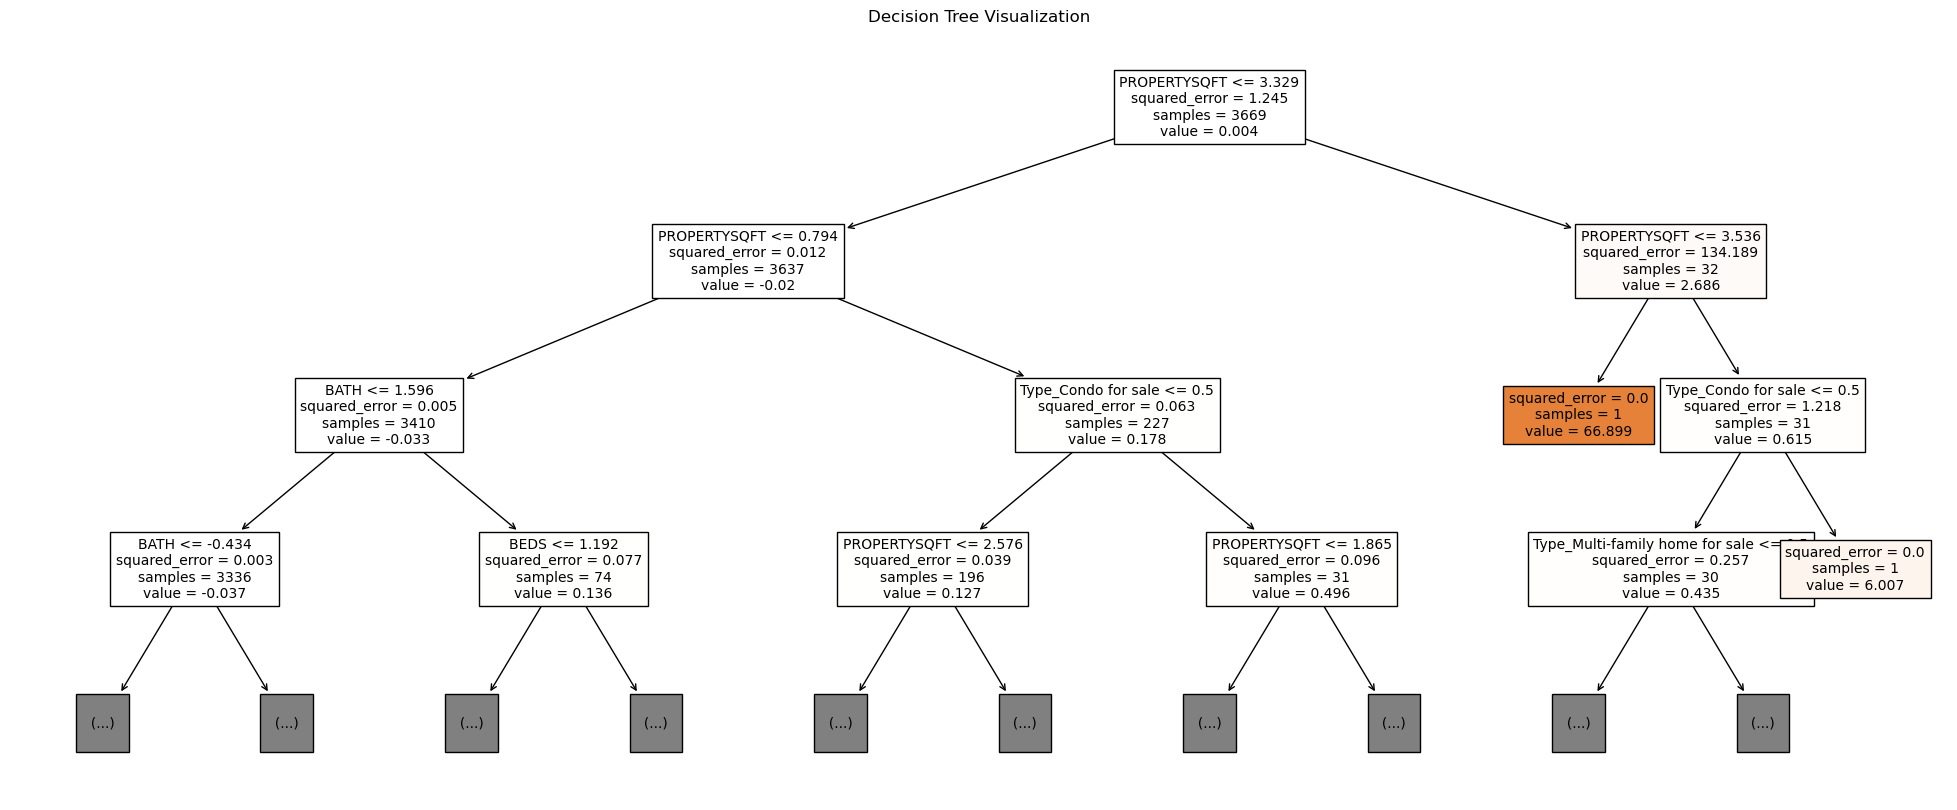

In [117]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(25,10))
plot_tree(dtree_model, 
          filled=True, 
          feature_names=X_train.columns, 
          max_depth=3,  
          fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

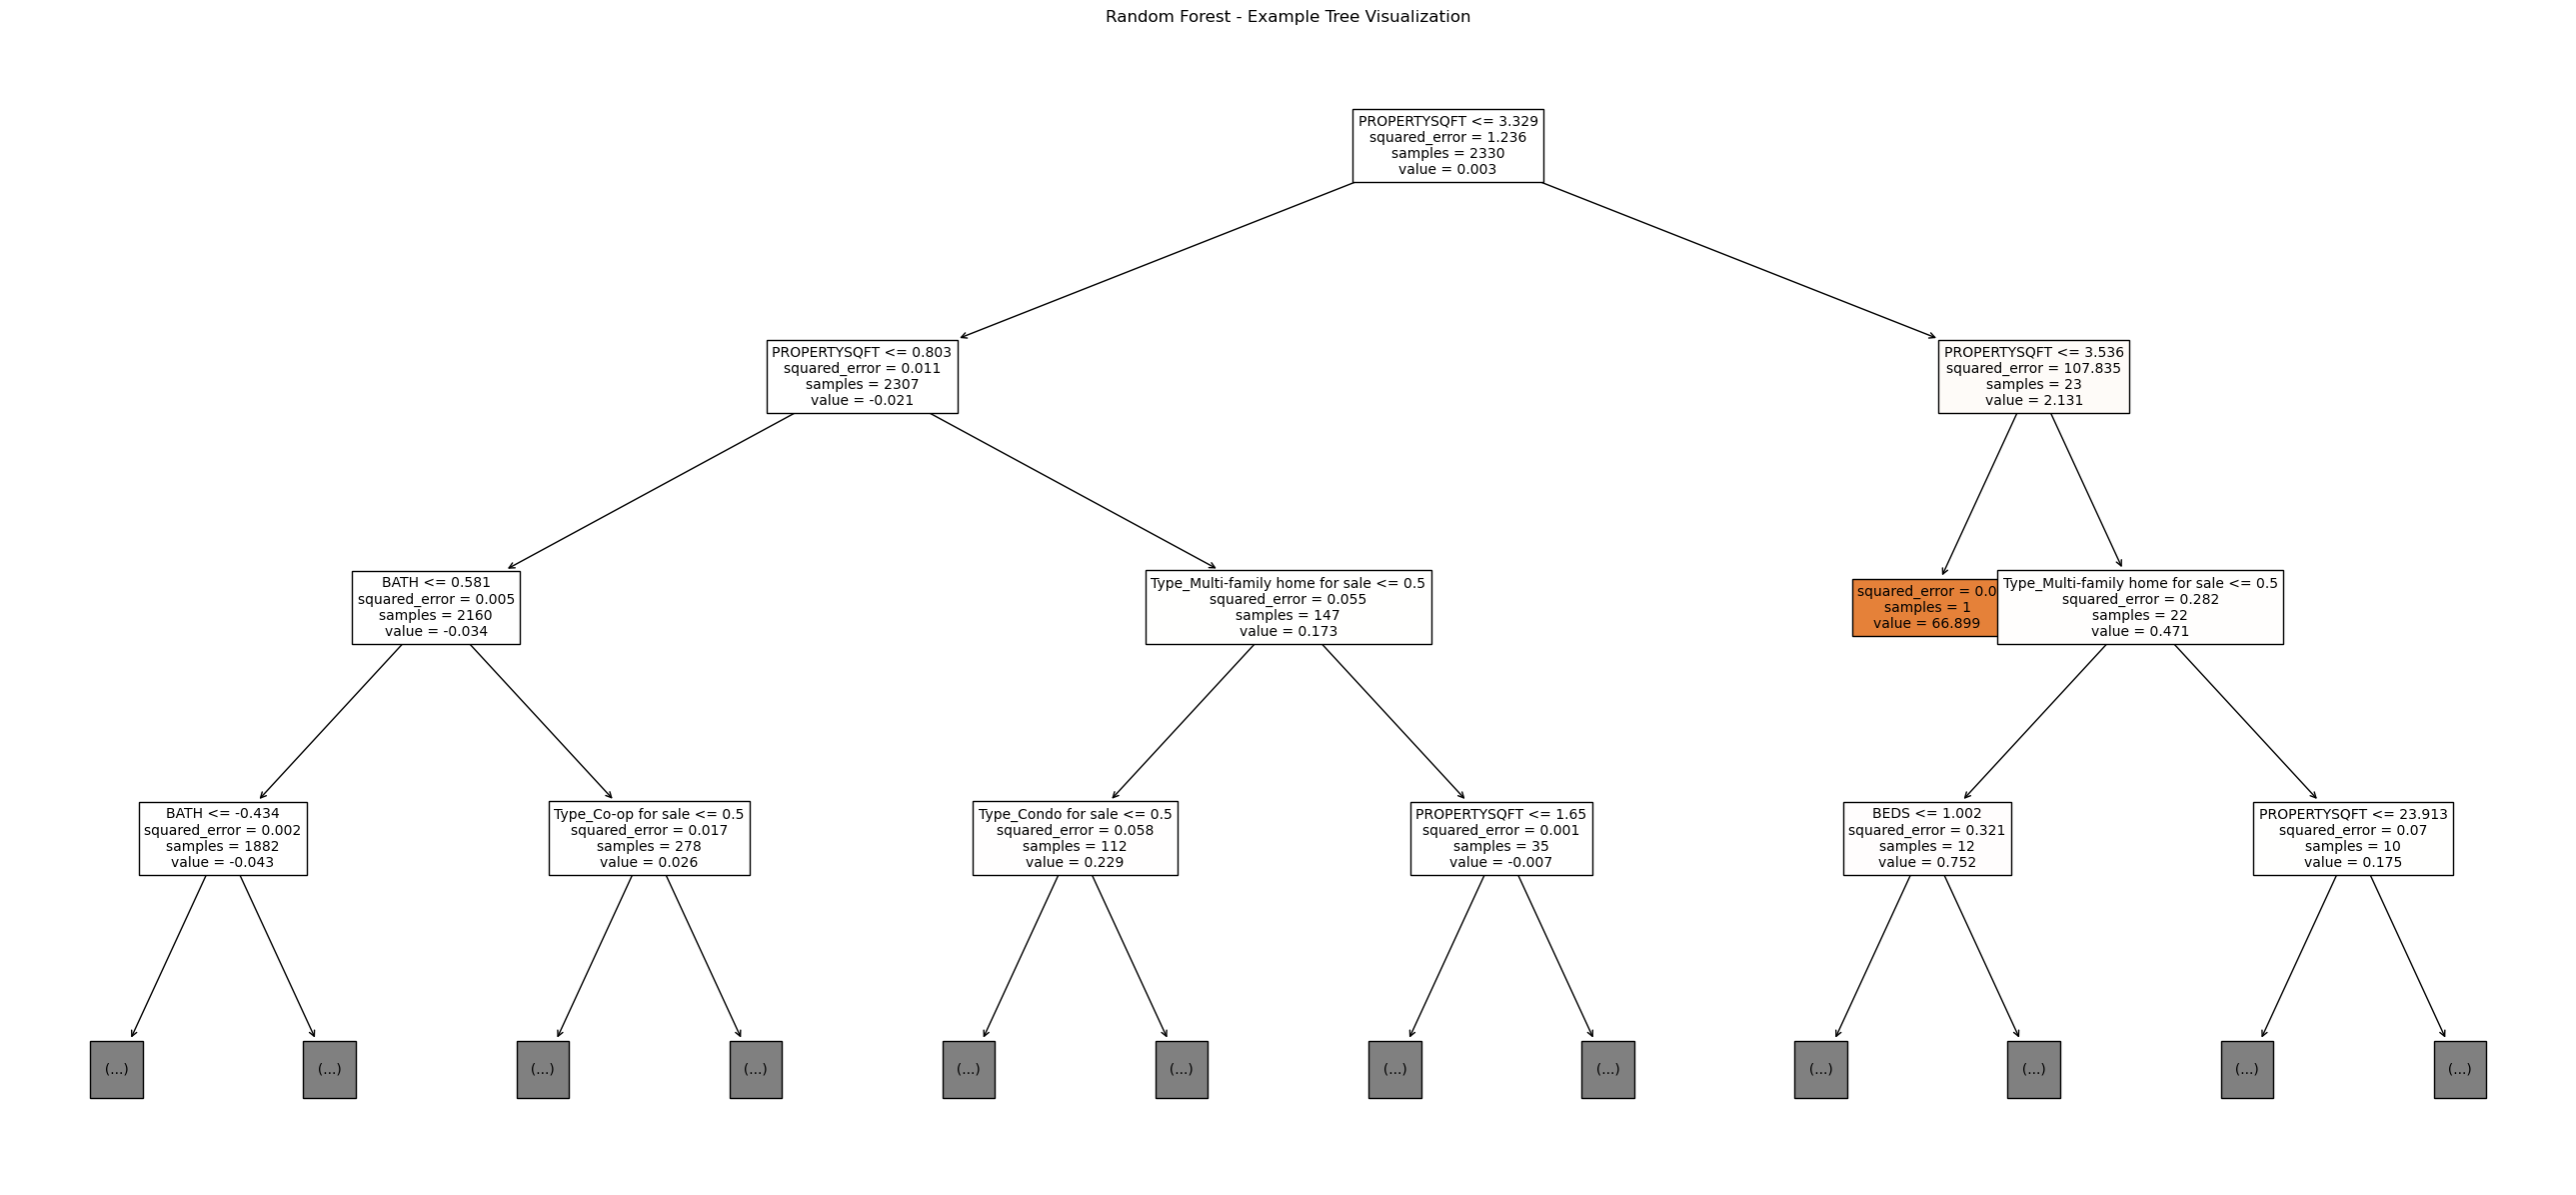

In [116]:
single_tree = rf_model.estimators_[0]

# Plot the selected tree
plt.figure(figsize=(33,15))
plot_tree(single_tree, 
          filled=True, 
          feature_names=X_train.columns, 
          max_depth=3, 
          fontsize=10)
plt.title('Random Forest - Example Tree Visualization')
plt.show()

In [118]:
data

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,Type_Co-op for sale,Type_Coming Soon,Type_Condo for sale,Type_Condop for sale,Type_Contingent,Type_For sale,Type_Foreclosure,Type_House for sale,Type_Land for sale,Type_Mobile house for sale,Type_Multi-family home for sale,Type_Pending,Type_Townhouse for sale
0,-0.064437,-0.519614,-0.179790,-0.340646,0.0,0.491332,0,0,1,0,0,0,0,0,0,0,0,0,0
1,6.007172,1.382596,3.880253,6.731665,0.0,0.491332,0,0,1,0,0,0,0,0,0,0,0,0,0
2,-0.066153,0.241270,-0.179790,-0.071246,0.0,-2.035283,0,0,0,0,0,0,0,1,0,0,0,0,0
3,-0.072109,-0.139172,-0.687295,-0.758983,0.0,0.491332,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1.641015,1.382596,-0.179790,5.255438,0.0,0.491332,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582,-0.055580,-0.900056,-0.687295,0.002785,0.0,0.491332,1,0,0,0,0,0,0,0,0,0,0,0,0
4583,-0.066620,-0.900056,-0.687295,0.002785,0.0,0.491332,1,0,0,0,0,0,0,0,0,0,0,0,0
4584,-0.034498,-0.900056,-0.687295,0.002785,0.0,-2.035283,1,0,0,0,0,0,0,0,0,0,0,0,0
4585,-0.055608,-0.519614,-0.687295,-0.666993,0.0,0.491332,0,0,1,0,0,0,0,0,0,0,0,0,0


In [119]:
scale_data = data

In [120]:
scale_data.to_csv('scale_cleaned_data.csv', index=False)